**Import Required Libraries**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Display all columns when printing DataFrame
pd.set_option('display.max_columns', None)

**Load Dataset**

In [17]:
file_path = "Cars Datasets 2025.csv"
df = pd.read_csv(file_path, encoding='windows-1252')
print("Dataset Loaded Successfully!")
print(df.head())

Dataset Loaded Successfully!
  Company Names     Cars Names      Engines CC/Battery Capacity HorsePower  \
0       FERRARI  SF90 STRADALE           V8             3990 cc     963 hp   
1   ROLLS ROYCE        PHANTOM          V12             6749 cc     563 hp   
2          Ford            KA+  1.2L Petrol            1,200 cc   70-85 hp   
3      MERCEDES        GT 63 S           V8            3,982 cc     630 hp   
4          AUDI     AUDI R8 Gt          V10            5,204 cc     602 hp   

  Total Speed Performance(0 - 100 )KM/H      Cars Prices       Fuel Types  \
0    340 km/h                   2.5 sec      $1,100,000   plug in hyrbrid   
1    250 km/h                   5.3 sec        $460,000            Petrol   
2    165 km/h                  10.5 sec  $12,000-$15,000           Petrol   
3    250 km/h                   3.2 sec        $161,000            Petrol   
4    320 km/h                   3.6 sec        $253,290            Petrol   

  Seats        Torque  
0     2        

**Data Cleaning**

In [18]:
# Clean Seats column: convert ranges like '4-5' to average
def clean_seats(value):
    nums = re.findall(r'\d+', str(value))
    return str(int(np.mean(list(map(int, nums))))) if nums else '0'

df['Seats'] = df['Seats'].apply(clean_seats)
df['Seats'] = pd.to_numeric(df['Seats'], errors='coerce').astype(float)

# Correct fuel type typos
df['Fuel Types'] = df['Fuel Types'].replace('plug in hyrbrid', 'Hybrid')

# Extract numeric CC/Battery Capacity
df['CC/Battery Capacity'] = df['CC/Battery Capacity'].astype(str).str.extract(r'(\d+\.?\d*)')

# Extract numeric Torque
df['Torque'] = df['Torque'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)

# Clean Performance (0-100 KM/H)
def clean_performance(value):
    if pd.isna(value):
        return None
    value = str(value).replace(' sec', '').replace(' ', '')
    value = re.sub(r'\([^)]*\)', '', value)
    value = value.replace('–', '-')
    if '-' in value:
        low, high = map(float, value.split('-'))
        return (low + high) / 2
    if '/' in value:
        low, high = map(float, value.split('/'))
        return (low + high) / 2
    return float(value)

df['Performance(0 - 100 )KM/H'] = df['Performance(0 - 100 )KM/H'].apply(clean_performance)

# Clean Prices
def clean_price(value):
    if pd.isna(value):
        return 0.0
    value = str(value).replace('$', '').replace(',', '').strip()
    if '-' in value:
        parts = value.split('-')
        if len(parts) == 2 and parts[0].replace('.', '', 1).isdigit() and parts[1].replace('.', '', 1).isdigit():
            return (float(parts[0]) + float(parts[1])) / 2
        else:
            return 0.0
    return float(value) if value.replace('.', '', 1).isdigit() else 0.0

df['Cars Prices'] = df['Cars Prices'].apply(clean_price).astype(float)

# Clean HorsePower
def clean_horsepower(value):
    if pd.isna(value):
        return 0.0
    value = str(value).replace('hp', '').replace('HP', '').replace(',', '').strip()
    nums = re.findall(r'\d+\.?\d*', value)
    return float(sum(map(float, nums)) / len(nums)) if nums else 0.0

df['HorsePower'] = df['HorsePower'].apply(clean_horsepower).astype(float)

# Clean Total Speed to numeric
df['Total Speed'] = df['Total Speed'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)

print("Data Cleaning Completed!\n")
print(df.info())

Data Cleaning Completed!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Names              1218 non-null   object 
 1   Cars Names                 1218 non-null   object 
 2   Engines                    1218 non-null   object 
 3   CC/Battery Capacity        1213 non-null   object 
 4   HorsePower                 1218 non-null   float64
 5   Total Speed                1218 non-null   float64
 6   Performance(0 - 100 )KM/H  1212 non-null   float64
 7   Cars Prices                1218 non-null   float64
 8   Fuel Types                 1218 non-null   object 
 9   Seats                      1218 non-null   float64
 10  Torque                     1217 non-null   float64
dtypes: float64(6), object(5)
memory usage: 104.8+ KB
None


**1: Top 5 Luxury Cars Report**

Top 5 Most Expensive Cars:
     Company Names        Cars Names  Cars Prices
887       Bugatti  La Voiture Noire   18000000.0
886       Bugatti        Centodieci    9000000.0
885       Bugatti              Divo    5800000.0
889       Bugatti           Mistral    5000000.0
8     LAMBORGHINI   VENENO ROADSTER    4500000.0


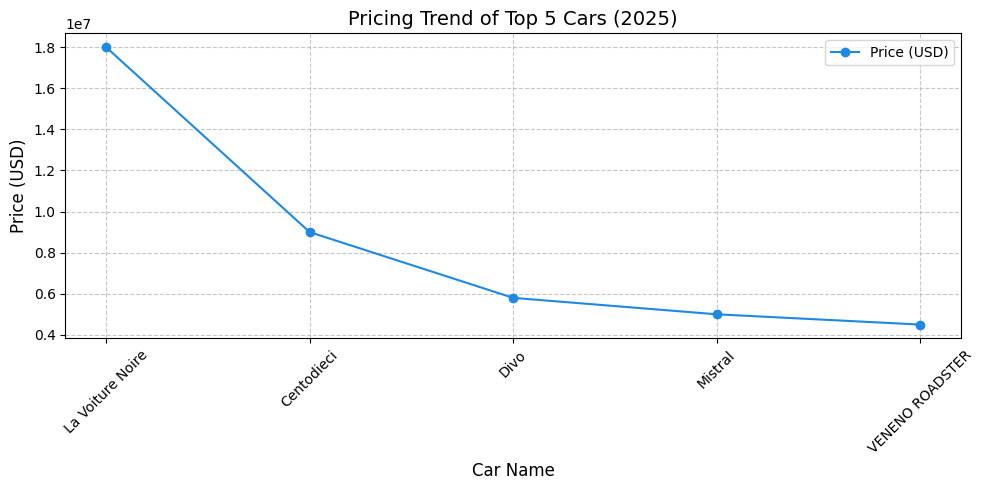

In [19]:
top_5_expensive = df[['Company Names', 'Cars Names', 'Cars Prices']].nlargest(5, 'Cars Prices')
print("Top 5 Most Expensive Cars:\n", top_5_expensive)

# Line Chart for Price Trend
plt.figure(figsize=(10, 5))
plt.plot(top_5_expensive['Cars Names'], top_5_expensive['Cars Prices'],
         marker='o', linestyle='-', color='#1e88e5', label='Price (USD)')
plt.title('Pricing Trend of Top 5 Cars (2025)', fontsize=14)
plt.xlabel('Car Name', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

**2: Fuel Strategy Planning**


Average Car Prices by Fuel Type (2025):
                  Fuel Types    Cars Prices
0                CNG/Petrol   11800.000000
1                    Diesel   35265.235849
2             Diesel Hybrid       0.000000
3             Diesel/Petrol   20250.000000
4                  Electric   66252.113402
5              Gas / Hybrid       0.000000
6                    Hybrid  163424.500000
7   Hybrid (Gas + Electric)       0.000000
8           Hybrid (Petrol)  148750.000000
9          Hybrid / Plug-in       0.000000
10          Hybrid/Electric   18000.000000
11            Hybrid/Petrol       0.000000
12                 Hydrogen   46633.333333
13                   Petrol  151360.354765
14          Petrol (Hybrid)       0.000000
15           Petrol, Diesel   38666.666667
16           Petrol, Hybrid   39252.500000
17               Petrol/AWD   34500.000000
18            Petrol/Diesel   24318.750000
19                Petrol/EV   20500.000000
20            Petrol/Hybrid   24262.500000
21          

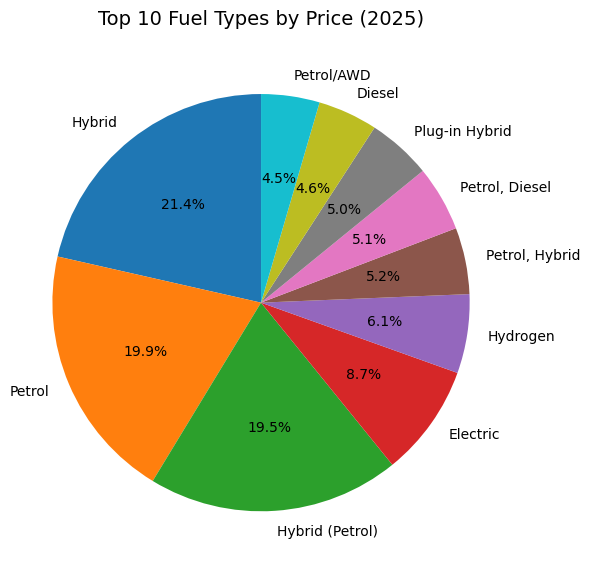

In [20]:
avg_price = df.groupby('Fuel Types')['Cars Prices'].mean().reset_index()
print("\nAverage Car Prices by Fuel Type (2025):\n", avg_price)

# Pie Chart (Top 10 by Price)
top10 = avg_price.sort_values(by='Cars Prices', ascending=False).head(10)
plt.figure(figsize=(6, 6))
plt.pie(top10['Cars Prices'], labels=top10['Fuel Types'], autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Fuel Types by Price (2025)', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

**3: Engine Market Trend**

In [21]:
engine_counts = df['Engines'].value_counts()
print("\nEngine Type Frequency in 2025 Market:\n", engine_counts)


Engine Type Frequency in 2025 Market:
 Engines
I4                                    64
V12                                   51
V6                                    39
Inline-4                              38
V8                                    34
                                      ..
1.5L,HYBRID                            1
2.4L Turbo I4 (i-FORCE MAX Hybrid)     1
2.0L Gas / 2.0L Hybrid                 1
1.8L / 2.0L Hybrid                     1
2.5L Hybrid / Plug-in Hybrid           1
Name: count, Length: 356, dtype: int64


**4: Performance Segment Analysis (HorsePower > 500)**

In [22]:
high_perf = df[df['HorsePower'] > 500][['Cars Names', 'Company Names', 'HorsePower','Cars Prices', 'Total Speed']]
print("\nHigh-Performance Cars (HorsePower > 500):\n", high_perf)


High-Performance Cars (HorsePower > 500):
                 Cars Names Company Names  HorsePower  Cars Prices  Total Speed
0            SF90 STRADALE       FERRARI       963.0    1100000.0        340.0
1                  PHANTOM   ROLLS ROYCE       563.0     460000.0        250.0
3                  GT 63 S      MERCEDES       630.0     161000.0        250.0
4               AUDI R8 Gt          AUDI       602.0     253290.0        320.0
5             Mclaren 720s           BMW       710.0     499000.0        341.0
...                    ...           ...         ...          ...          ...
961     NSX Carbon Edition         Acura       537.0     157000.0        307.0
1036                    GT          Ford       660.0     500000.0        348.0
1050  Mustang Shelby GT500          Ford       760.0      79420.0        290.0
1051  Mustang Shelby GT350          Ford       526.0      59140.0        280.0
1212       787B (Race Car)         Mazda       700.0          0.0        320.0

[181 ro

**5: Company-wise Acceleration Insights**


Average 0-100 KM/H by Company (2025):
         Company Names  Performance(0 - 100 )KM/H
0             Bugatti                   2.400000
1             FERRARI                   3.033333
2         LAMBORGHINI                   3.037500
3               Tesla                   3.510000
4        ASTON MARTIN                   3.527273
5             BENTLEY                   4.000000
6             Porsche                   4.254167
7            MERCEDES                   4.757143
8        ROLLS ROYCE                    4.800000
9         ROLLS ROYCE                   4.913793
10               AUDI                   5.161905
11  Jaguar Land Rover                   5.370000
12              Acura                   5.677778
13           Cadillac                   5.940000
14             NISSAN                   5.970000
15              VOLVO                   6.266667
16                GMC                   6.854237
17                BMW                   6.880488
18               Jeep        

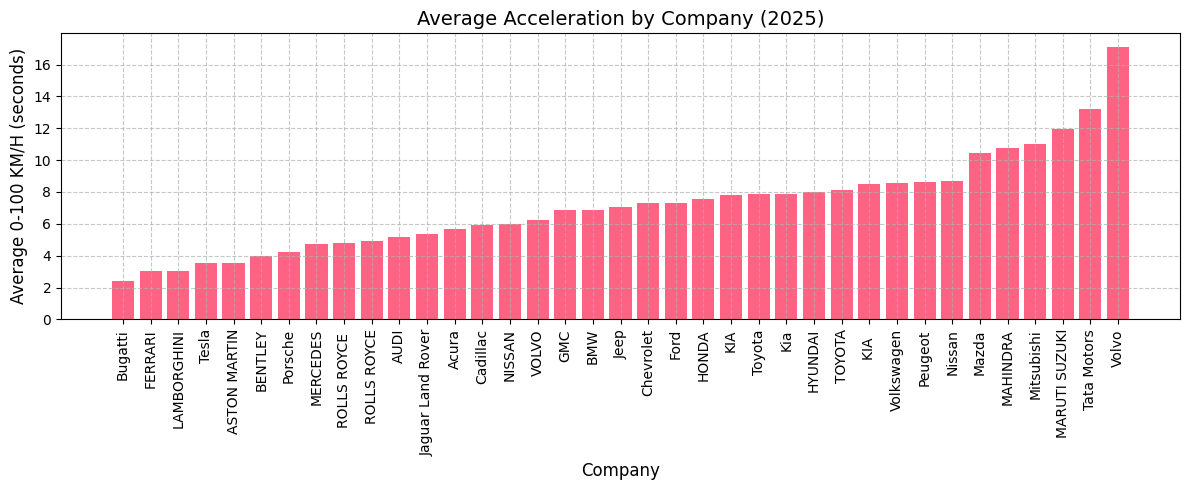

In [23]:
avg_acceleration = df.groupby('Company Names')['Performance(0 - 100 )KM/H'].mean().sort_values().reset_index()
print("\nAverage 0-100 KM/H by Company (2025):\n", avg_acceleration)

plt.figure(figsize=(12, 5))
plt.bar(avg_acceleration['Company Names'], avg_acceleration['Performance(0 - 100 )KM/H'], color='#ff6384')
plt.title('Average Acceleration by Company (2025)', fontsize=14)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Average 0-100 KM/H (seconds)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**6: Seating Capacity Analysis**


Number of Cars by Seating Capacity:
 Seats
1.0       3
2.0     141
3.0      14
4.0     164
5.0     693
6.0      20
7.0     149
8.0      30
9.0       1
12.0      1
15.0      1
20.0      1
Name: count, dtype: int64


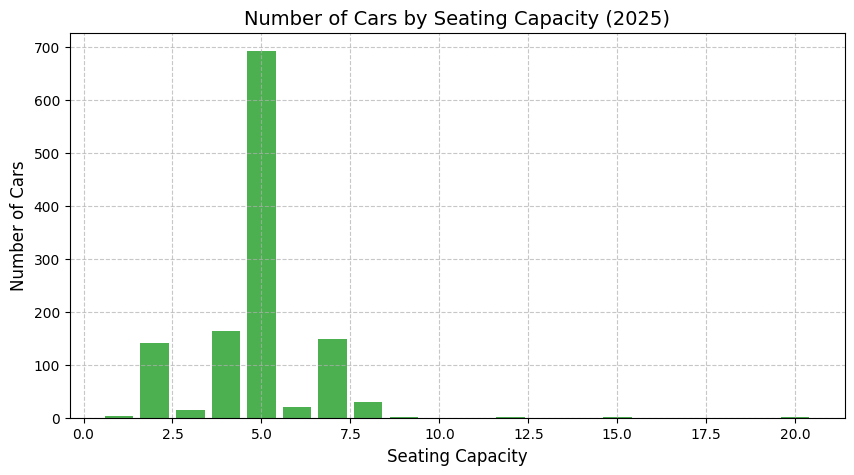

In [24]:
seats_counts = df['Seats'].value_counts().sort_index()
print("\nNumber of Cars by Seating Capacity:\n", seats_counts)

plt.figure(figsize=(10, 5))
plt.bar(seats_counts.index, seats_counts.values, color='#4caf50')
plt.title('Number of Cars by Seating Capacity (2025)', fontsize=14)
plt.xlabel('Seating Capacity', fontsize=12)
plt.ylabel('Number of Cars', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**7: Speed vs Brand Leadership**

In [25]:
avg_speed = df.groupby('Company Names')['Total Speed'].mean().sort_values(ascending=False).reset_index()
print("\nAverage Total Speed by Company (2025):\n", avg_speed)
print(f"\nBrand with highest average speed: {avg_speed.iloc[0]['Company Names']} ({avg_speed.iloc[0]['Total Speed']} km/h)")


Average Total Speed by Company (2025):
         Company Names  Total Speed
0             Bugatti   420.000000
1         LAMBORGHINI   334.000000
2             FERRARI   331.111111
3        ASTON MARTIN   330.000000
4             BENTLEY   318.000000
5             Porsche   278.468750
6               Tesla   261.500000
7                AUDI   260.476190
8         ROLLS ROYCE   250.000000
9            MERCEDES   250.000000
10       ROLLS ROYCE    250.000000
11  Jaguar Land Rover   249.575000
12                BMW   240.463415
13             NISSAN   232.500000
14           Cadillac   227.250000
15              Acura   227.074074
16              VOLVO   223.333333
17              HONDA   209.714286
18                Kia   209.444444
19         Volkswagen   203.587156
20            Peugeot   202.129630
21             Nissan   200.281879
22          Chevrolet   200.206897
23              KIA     200.000000
24            HYUNDAI   200.000000
25               Ford   198.592593
26            

**8: Variability in Key Metrics**

In [26]:
std_metrics = {
    'Price': np.std(df['Cars Prices']),
    'HorsePower': np.std(df['HorsePower']),
    'Torque': np.std(df['Torque'])
}

print("\nStandard Deviation of Key Metrics (2025):")
for metric, value in std_metrics.items():
    print(f"{metric}: {value:.2f}")


Standard Deviation of Key Metrics (2025):
Price: 690976.00
HorsePower: 222.63
Torque: 290.50
